<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

 Train data shape :(32, 32, 3) 

 Train label shape is :(1,) 

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9766 - accuracy: 0.2831 - val_loss: 1.8498 - val_accuracy: 0.3338
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8029 - accuracy: 0.3595 - val_loss: 1.7680 - val_accuracy: 0.3690
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7503 - accuracy: 0.3768 - val_loss: 1.7385 - val_accuracy: 0.3840
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7163 - accuracy: 0.3911 - val_loss: 1.6919 - val_accuracy: 0.4013
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6827 - accuracy: 0.4041 - val_loss: 1.6779 - val_accuracy: 0.4096
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6543 - accuracy: 0.4149 - val_loss: 1.6527 - val_accuracy: 0.4152
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/ste

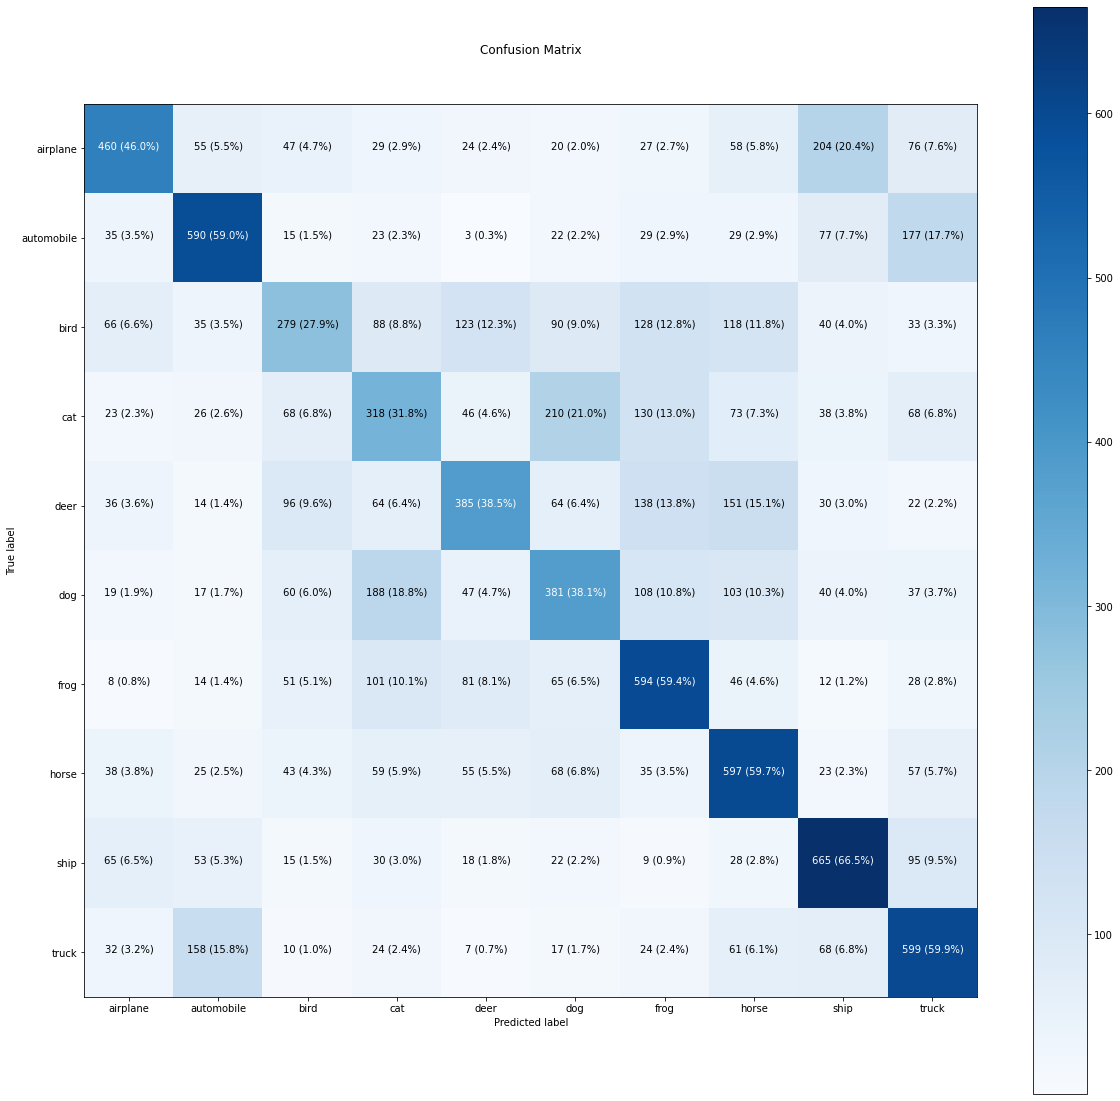

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
# current = os.path.dirname(os.path.dirname(os.path.realpath(__file__)))
# sys.path.append(current)
# from utils import make_confusion_matrix, plot_random_images_using_predictions, plot_random_images, plot_loss_curves

train_data, train_labels, test_data, test_labels = None, None, None, None
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
# print(f" Train data is :{train_data[0]} \n")
# print(f" Train label is :{train_labels[0][0]} \n")
print(f" Train data shape :{train_data[0].shape} \n")
print(f" Train label shape is :{train_labels[0].shape} \n")
# print(train_labels.squeeze())

# Visualise random data
# for i in range(20):
#     plot_random_images(train_data, train_labels.squeeze(), classes)

# normalize train and test data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

# define base model
# initialise random seed
tf.random.set_seed(42)

# Define the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
], name = 'model_CIFAR1_1')

# Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                metrics=['accuracy'])

# Learning rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))
file_path = f"saved_models/{model_1.name}"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_accuracy', save_best_only=True)
# Fit the model
history_1 = model_1.fit(train_data_norm,
                        train_labels,
                        epochs=100,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[model_checkpoint])

# Plot loss versus Epochs Curve
# plot_loss_curves(history_1)

# Evaluate the model
model_1.evaluate(test_data_norm, test_labels)

# Plot the Confusion Matrx
y_preds = model_1.predict(test_data_norm)
make_confusion_matrix(y_true=test_labels,
                      y_pred=tf.argmax(y_preds, axis=1),
                      classes=classes,
                      figsize=(20, 20),
                          text_size=10)

In [ ]:
y_preds = model_3.predict(test_data_norm)
tf.argmax(y_preds, axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 3, 1, 5])>

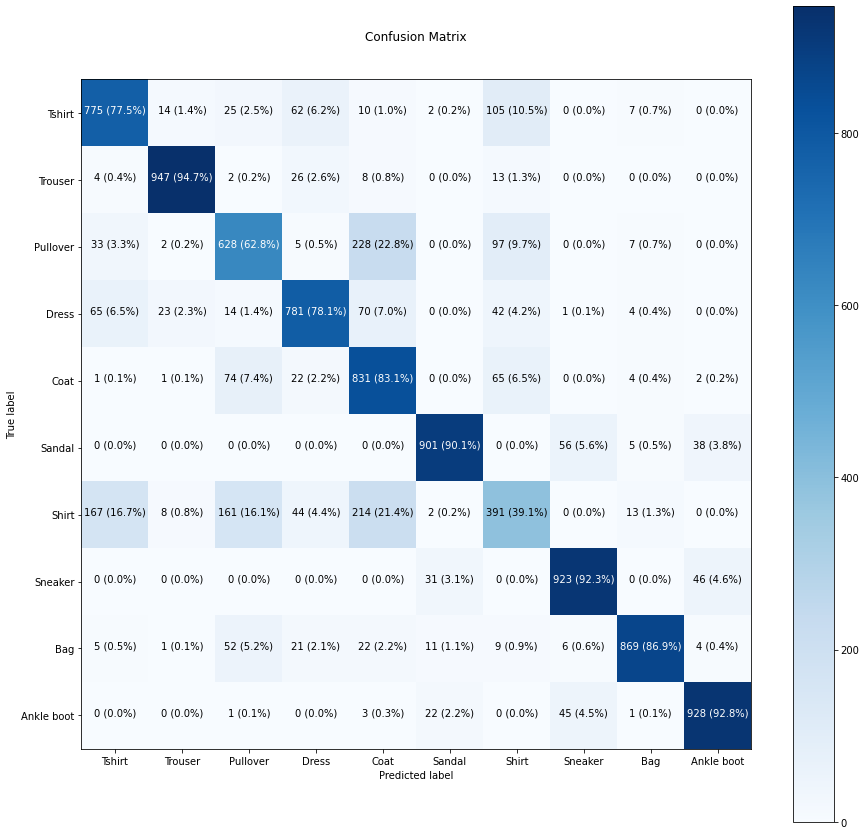

In [ ]:
make_confusion_matrix(test_labels, tf.argmax(y_preds, axis=1), class_names, figsize=(15,15), text_size=10)